**Chapter 12 Q3**<br>
Author: 314657018 統計碩1 陳葳芃Andy
===
**In this problem, you will perform *K*-means clustering manually, with *K* = 2, on a small example with *n* = 6 observations and *p* = 2 features. The observations are as follows.**

| Obs. | X1 | X2 |
|------|----|----|
| 1    | 1  | 4  |
| 2    | 1  | 3  |
| 3    | 0  | 4  |
| 4    | 5  | 1  |
| 5    | 6  | 2  |
| 6    | 4  | 0  |

**Q3-(a)**
==
**Plot the observations.**

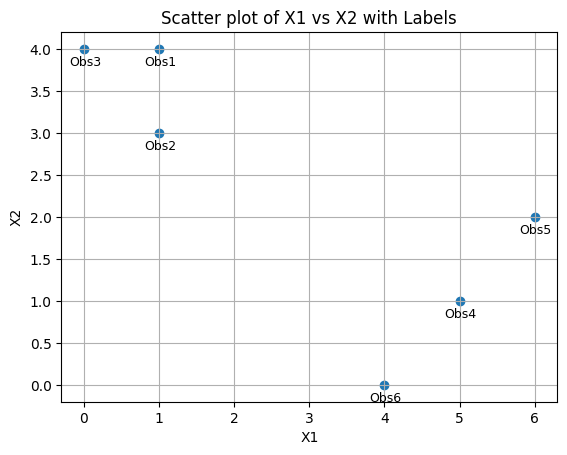

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = {
    "Obs.": [1, 2, 3, 4, 5, 6],
    "X1":   [1, 1, 0, 5, 6, 4],
    "X2":   [4, 3, 4, 1, 2, 0]
}

df = pd.DataFrame(data)
df.set_index("Obs.", inplace=True)

plt.scatter(df["X1"],df["X2"])
#print(df.columns)
# 標註每個點
for i, row in df.iterrows():
    plt.text(row["X1"]-0.2, row["X2"]-0.2, f"Obs{i}", fontsize=9)

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Scatter plot of X1 vs X2 with Labels")
plt.grid(True)
plt.show()

**Q3-(b)**
==
**Randomly assign a cluster label to each observation. You can use the <font color=#A52A2A> np.random.choice()</font> function to do this. Report the cluster labels for each observation.**

In [2]:
np.random.seed(314657)
cls_list=np.random.choice([0, 1], size=6, replace=True, p=None)
df["Cluster"] = cls_list
print(df)

      X1  X2  Cluster
Obs.                 
1      1   4        0
2      1   3        0
3      0   4        0
4      5   1        1
5      6   2        0
6      4   0        0


**Q3-(c)**
==
**Compute the centroid for each cluster.**

In [3]:
as_centroids = df.groupby("Cluster")[["X1","X2"]].mean()
df["assign_centroid"] = df["Cluster"].map(as_centroids.apply(tuple, axis=1))
print(df)
print("\n")
print(as_centroids)

      X1  X2  Cluster assign_centroid
Obs.                                 
1      1   4        0      (2.4, 2.6)
2      1   3        0      (2.4, 2.6)
3      0   4        0      (2.4, 2.6)
4      5   1        1      (5.0, 1.0)
5      6   2        0      (2.4, 2.6)
6      4   0        0      (2.4, 2.6)


          X1   X2
Cluster          
0        2.4  2.6
1        5.0  1.0


**Q3-(d)**
==
**Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.**<br>
<font color=#0000FF> **ans: I report the cluster labels for each observation with `"N1Cluster"` variable.**</font> <br>


In [4]:
def assign_to_nearest_centroid(row, centroids):
    distances = centroids.apply(lambda c: np.sqrt((row["X1"] - c["X1"])**2 + (row["X2"] - c["X2"])**2), axis=1)
    return distances.idxmin()  # 回傳最近 centroid 的 cluster label

df["N1Cluster"] = df.apply(assign_to_nearest_centroid, axis=1, centroids=as_centroids)

print("DataFrame with new cluster assignments:")
print(df)

DataFrame with new cluster assignments:
      X1  X2  Cluster assign_centroid  N1Cluster
Obs.                                            
1      1   4        0      (2.4, 2.6)          0
2      1   3        0      (2.4, 2.6)          0
3      0   4        0      (2.4, 2.6)          0
4      5   1        1      (5.0, 1.0)          1
5      6   2        0      (2.4, 2.6)          1
6      4   0        0      (2.4, 2.6)          1


**Q3-(e)**
==
**Repeat (c) and (d) until the answers obtained stop changing.**<br>

<font color=#0000FF> Andy's coding logic: <br>

1. Initialize clusters and centroids
2. Set up a new cluster column for comparison
3. Start the iteration loop
4. Check for convergence
5. Repeat until stable

</font> <br>


In [5]:
N1_centroids = df.groupby("N1Cluster")[["X1","X2"]].mean()
df["N1_centroid"] = df["N1Cluster"].map(N1_centroids.apply(tuple, axis=1))
print(df)

      X1  X2  Cluster assign_centroid  N1Cluster  \
Obs.                                               
1      1   4        0      (2.4, 2.6)          0   
2      1   3        0      (2.4, 2.6)          0   
3      0   4        0      (2.4, 2.6)          0   
4      5   1        1      (5.0, 1.0)          1   
5      6   2        0      (2.4, 2.6)          1   
6      4   0        0      (2.4, 2.6)          1   

                                   N1_centroid  
Obs.                                            
1     (0.6666666666666666, 3.6666666666666665)  
2     (0.6666666666666666, 3.6666666666666665)  
3     (0.6666666666666666, 3.6666666666666665)  
4                                   (5.0, 1.0)  
5                                   (5.0, 1.0)  
6                                   (5.0, 1.0)  


In [6]:
##Set up N2Cluster variable to make a comparision with N1Cluster
df["N2Cluster"]=np.array([999,999,999,999,999,999])
print(df)

      X1  X2  Cluster assign_centroid  N1Cluster  \
Obs.                                               
1      1   4        0      (2.4, 2.6)          0   
2      1   3        0      (2.4, 2.6)          0   
3      0   4        0      (2.4, 2.6)          0   
4      5   1        1      (5.0, 1.0)          1   
5      6   2        0      (2.4, 2.6)          1   
6      4   0        0      (2.4, 2.6)          1   

                                   N1_centroid  N2Cluster  
Obs.                                                       
1     (0.6666666666666666, 3.6666666666666665)        999  
2     (0.6666666666666666, 3.6666666666666665)        999  
3     (0.6666666666666666, 3.6666666666666665)        999  
4                                   (5.0, 1.0)        999  
5                                   (5.0, 1.0)        999  
6                                   (5.0, 1.0)        999  


In [7]:
while 1:
  df["N2Cluster"] = df.apply(assign_to_nearest_centroid, axis=1, centroids=N1_centroids)
  N2_centroids = df.groupby("N2Cluster")[["X1","X2"]].mean()
  df["N2_centroid"] = df["N2Cluster"].map(N2_centroids.apply(tuple, axis=1))

  if (df['N1Cluster'] == df['N2Cluster']).all():
    print("break")
    break
  else:
    df["N1Cluster"] = df["N2Cluster"]
    df["N1_centroid"]=df["N2_centroid"]
    print("\n")
    print("NEXT ROUND")

print(df)

break
      X1  X2  Cluster assign_centroid  N1Cluster  \
Obs.                                               
1      1   4        0      (2.4, 2.6)          0   
2      1   3        0      (2.4, 2.6)          0   
3      0   4        0      (2.4, 2.6)          0   
4      5   1        1      (5.0, 1.0)          1   
5      6   2        0      (2.4, 2.6)          1   
6      4   0        0      (2.4, 2.6)          1   

                                   N1_centroid  N2Cluster  \
Obs.                                                        
1     (0.6666666666666666, 3.6666666666666665)          0   
2     (0.6666666666666666, 3.6666666666666665)          0   
3     (0.6666666666666666, 3.6666666666666665)          0   
4                                   (5.0, 1.0)          1   
5                                   (5.0, 1.0)          1   
6                                   (5.0, 1.0)          1   

                                   N2_centroid  
Obs.                                   

**Q3-(f)**
==
**In your plot from (a), color the observations according to the cluster labels obtained.**

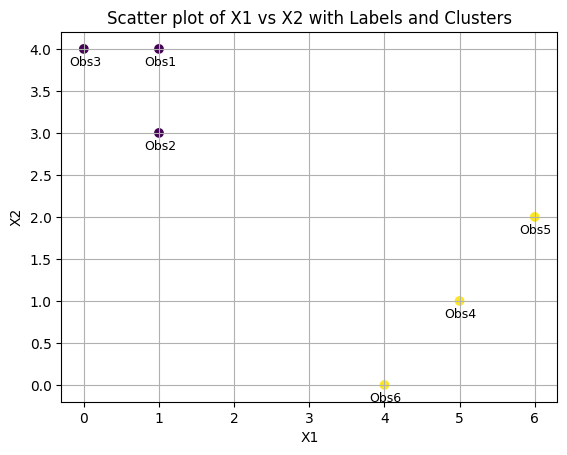

In [8]:
plt.scatter(df["X1"],df["X2"],c=df["N1Cluster"])
#print(df.columns)
# 標註每個點
for i, row in df.iterrows():
    plt.text(row["X1"]-0.2, row["X2"]-0.2, f"Obs{i}", fontsize=9)

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Scatter plot of X1 vs X2 with Labels and Clusters")
plt.grid(True)
plt.show()

**Appendix A: Details of *while loop* Logic Explanation**
==

1. **Initialize clusters and centroids**
    * Start with the cluster assignments from the previous step (N1Cluster).
    * Calculate the centroid for each cluster by taking the average of X1 and X2 for points in that cluster (N1_centroids).
    * Map each point to its centroid (N1_centroid) for reference.
2. **Set up a new cluster column for comparison**
    * Create N2Cluster to store the new cluster assignment for each point in the next iteration.
    * Initialize it with a value that doesn’t exist in the data (e.g., 999) so we can check for changes.
3. **Start the iteration loop**
    * Assign points to the nearest centroid:
        * For each point, calculate the Euclidean distance to each centroid.
        * Assign the point to the cluster of the closest centroid (N2Cluster).
    * Update centroids:
        * Recalculate the centroids based on the new cluster assignments (N2_centroids).
        * Map each point to its new centroid (N2_centroid).
4. **Check for convergence**
    * If N2Cluster is exactly the same as N1Cluster, the clusters are stable, and we stop the loop.
    * Otherwise, update N1Cluster and N1_centroid to the new values and update N1_centroids for the next iteration. Then repeat.
5. **Repeat until stable**
    * This loop continues until the cluster assignments no longer change.

**Appendix B: Code for testing 測試用code**
==

In [ ]:
<font color=#0000FF> **ans:**</font> <br>
<font color=#A52A2A> </font>